<a href="https://colab.research.google.com/github/akd18/DS-SL/blob/main/Customer%20Service%20Request%20Analysis%20(Project)/Project_Customer_Service_Requests_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.

In [ ]:
import os
import urllib.request
from zipfile import ZipFile

In [ ]:
resource_path = 'Resources'
download_url = 'https://github.com/Simplilearn-Edu/Data-Science-with-Python-Project-2-/raw/master/Data%20Science%20with%20Python%20Two.zip'
if not os.path.isdir(resource_path):
    os.makedirs(resource_path)
urllib.request.urlretrieve(download_url,f'{resource_path}/DataSet.zip')

('Resources/DataSet.zip', <http.client.HTTPMessage at 0x28172f19f40>)

In [ ]:
with ZipFile(f'{resource_path}/DataSet.zip', 'r') as zip:
    zip.printdir()
    zip.extractall(resource_path)

File Name                                             Modified             Size
311_Service_Requests_from_2010_to_Present.csv  2019-04-12 15:59:56    187130727


In [ ]:
os.listdir('Resources')

['311_Service_Requests_from_2010_to_Present.csv', 'DataSet.zip']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data_raw = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',parse_dates=['Created Date','Closed Date'],
                       infer_datetime_format=True,low_memory=False)
data_raw.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
data_raw.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [ ]:
data_raw.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


## 2.

In [ ]:
data = data_raw.copy()

In [ ]:
Request_Closing_Time = data['Closed Date'] - data['Created Date']
data.insert(3,'Request_Closing_Time',Request_Closing_Time)
data.head()

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## 3.

- We had seen that there were few columns with no data, we shall drop these.

In [ ]:
data.drop(columns=data.columns[data.isna().sum()==len(data)],inplace=True)

- We shall try to analyse the non-numerical object type colums,

In [ ]:
for column in data.select_dtypes('object').columns:
    print("__"*15)
    print("***** ",column," *****")
    print("=="*15)
    print(data[column].value_counts(),"\n\n")

______________________________
*****  Agency  *****
NYPD    300698
Name: Agency, dtype: int64 


______________________________
*****  Agency Name  *****
New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64 


______________________________
*****  Complaint Type  *****
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth              

*****  Status  *****
Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64 


______________________________
*****  Due Date  *****
07-12-15 7:04             9
06-07-15 6:23             9
11-07-15 7:34             9
07-04-15 6:28             8
08-01-15 7:22             8
                         ..
08/17/2015 07:28:07 PM    1
04-12-15 3:58             1
07/13/2015 12:32:02 AM    1
08/13/2015 08:16:30 AM    1
10/19/2015 02:30:40 PM    1
Name: Due Date, Length: 259851, dtype: int64 


______________________________
*****  Resolution Description  *****
The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                    

11-08-15 7:34             24
10-11-15 7:03             22
05-10-15 7:01             18
12-08-15 7:44             18
12-07-15 23:17            17
                          ..
05/13/2015 07:54:53 AM     1
06/18/2015 12:04:39 PM     1
06/22/2015 06:28:47 PM     1
06-10-15 5:42              1
10-10-15 4:32              1
Name: Resolution Action Updated Date, Length: 237895, dtype: int64 


______________________________
*****  Community Board  *****
12 MANHATTAN                 12390
01 BROOKLYN                  10920
05 QUEENS                     9422
01 QUEENS                     9197
09 QUEENS                     8013
18 BROOKLYN                   7553
07 QUEENS                     7448
12 BROOKLYN                   7217
12 QUEENS                     7190
03 BROOKLYN                   6984
10 MANHATTAN                  6703
03 MANHATTAN                  6536
11 BROOKLYN                   6231
03 QUEENS                     5989
05 BROOKLYN                   5772
10 QUEENS                

Barberi                                1
St. George Terminal (Staten Island)    1
Name: Ferry Terminal Name, dtype: int64 


______________________________
*****  Location  *****
(40.83036235589997, -73.86602154214397)     902
(40.72195913199264, -73.80969682426189)     505
(40.703818970933284, -73.94207345177706)    476
(40.708726489323325, -73.7906539235748)     341
(40.64713190020787, -74.00462341153786)     340
                                           ... 
(40.728577390796985, -73.90913253901971)      1
(40.82289821105246, -73.95085805240372)       1
(40.682945501425124, -73.81853716747747)      1
(40.606269696759036, -73.9881586338175)       1
(40.824106422612694, -73.95213261224792)      1
Name: Location, Length: 126048, dtype: int64 




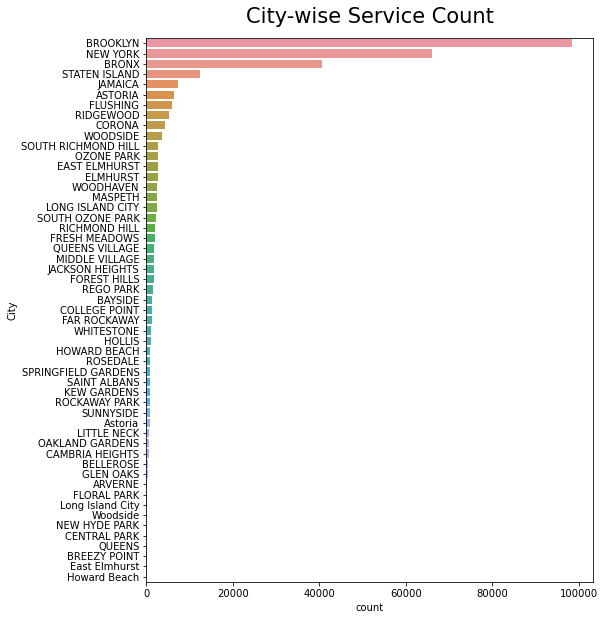

In [ ]:
fig,ax = plt.subplots(figsize=(8,10))
sns.countplot(data=data, y='City', ax=ax, order=data['City'].value_counts().index,)
ax.set_title('City-wise Service Count',fontdict={'fontsize':21}, pad=15)
plt.show()


###  i. As we can see, Brooklyn, New York and Bronx had the highest number of servive requests.

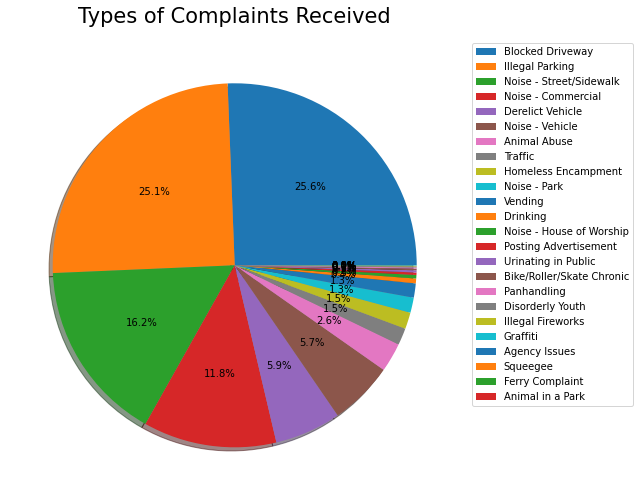

In [ ]:
length = len(data['Complaint Type'].unique())
fig,ax = plt.subplots(figsize=(9,10))
ax.pie(data['Complaint Type'].value_counts(), labels = data['Complaint Type'].value_counts().index,
       autopct='%1.1f%%', shadow=True, labeldistance=None,)
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax.set_title('Types of Complaints Received',fontdict={'fontsize':21}, pad=15)
plt.tight_layout()

### ii. Blocked Driveways and Illegal Parking complaints were the most common and constituded over 50% of all Complaints Received. 

- We will now check the distribution of the numerical values.

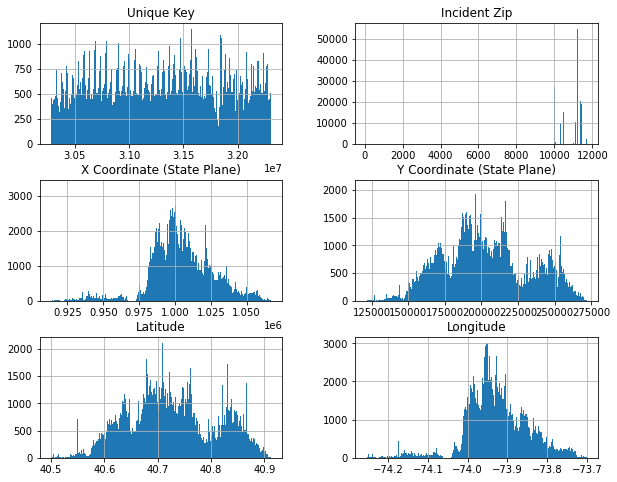

In [ ]:
data.hist(bins=500,figsize=(10,8))
plt.show()

- As we can see there arent any discrete numerical data available.

- We can try to create a plot of the location map using the latitude and longitude coordinates of the complaint location.

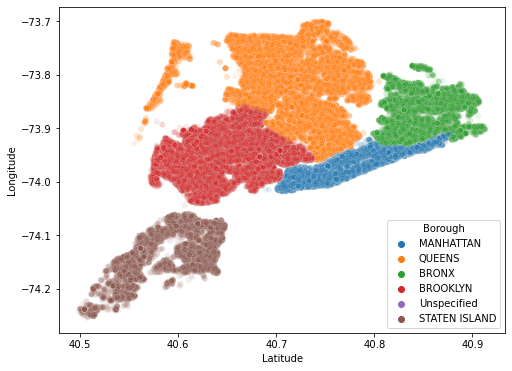

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=data, x='Latitude',y='Longitude', alpha=0.1, hue='Borough',)
plt.show()

- We can see a rough map of the areas of the NYC.

- We shall try to find if there are any relation between the numerical attributes using scatterplots.

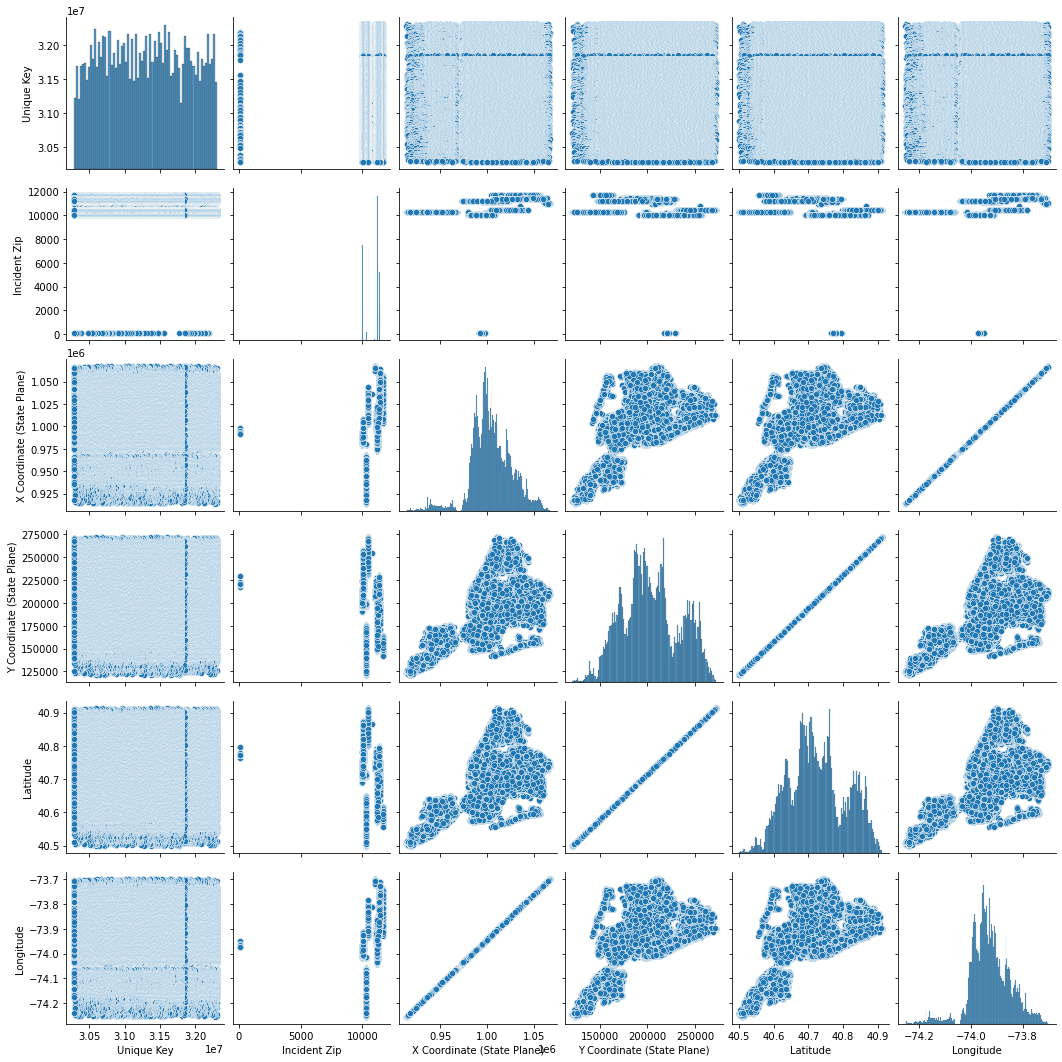

In [ ]:
sns.pairplot(data,)

- We can see that the 'X Coordinate (State Plane)' and 'Y Coordinate (State Plane)' are highly linearly coorelated with 'Longitude' and 'Latitude' respectively. We can check the correlation using Pearson's Correlation and heatmap. None of the other attributes seems to have any correlation.

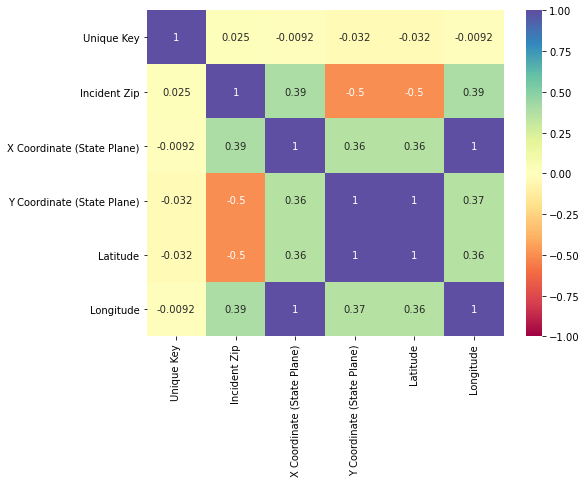

In [ ]:
data_corr = data.corr()
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data_corr,annot=True,vmin=-1,vmax=1,cmap='Spectral')
plt.show()

### iii. The 'X Coordinate (State Plane)' and 'Y Coordinate (State Plane)' are highly linearly coorelated with 'Longitude' and 'Latitude' respectively and can be considered necessarily as the same information.

In [ ]:
not_closed_req = data.loc[data['Status'] != 'Closed',:].groupby(['Status','City'])['City'].count()
not_closed_req.groupby(['Status'],group_keys=False).apply(lambda x: x.sort_values(ascending=False))

Status    City               
Assigned  BROOKLYN               19
          NEW YORK               15
          BRONX                   6
          STATEN ISLAND           2
          MASPETH                 2
          FLUSHING                2
          BAYSIDE                 2
          RICHMOND HILL           1
          OZONE PARK              1
          LONG ISLAND CITY        1
          JAMAICA                 1
Draft     BROOKLYN                1
          BRONX                   1
Open      NEW YORK               18
          BROOKLYN               12
          JAMAICA                 9
          STATEN ISLAND           6
          BRONX                   5
          WOODHAVEN               2
          FRESH MEADOWS           2
          WOODSIDE                1
          ELMHURST                1
          CORONA                  1
          EAST ELMHURST           1
          JACKSON HEIGHTS         1
          FLUSHING                1
          LONG ISLAND CITY        

### iv. Interms of Open Unassigned Service Requests, New York(18) has the highest followed by Brooklyn(12). Brooklyn has 19 and New York has 15 Service Requests that are assigned and yet to be closed.

## 4. 

In [ ]:
data['Request_Closing_Time']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
               ...      
300693               NaT
300694   0 days 02:00:31
300695   0 days 03:07:17
300696   0 days 04:05:33
300697   0 days 04:08:49
Name: Request_Closing_Time, Length: 300698, dtype: timedelta64[ns]

In [ ]:
data['Request_Closing_Time'].notnull()

0          True
1          True
2          True
3          True
4          True
          ...  
300693    False
300694     True
300695     True
300696     True
300697     True
Name: Request_Closing_Time, Length: 300698, dtype: bool

In [ ]:
#data = data[data['Request_Closing_Time'].notnull()]

In [ ]:
complaint_resolution_borough = data.groupby(['Borough','Complaint Type'])['Request_Closing_Time']. \
                                apply(lambda x: x.sum()/len(x))

In [ ]:
complaint_resolution_borough = complaint_resolution_borough.groupby('Borough',group_keys=False). \
                                apply(lambda x: x.sort_values(ascending=False))

In [ ]:
complaint_resolution_borough

Borough        Complaint Type           
BRONX          Panhandling                 0 days 14:12:49.421052631
               Derelict Vehicle            0 days 09:13:22.257552483
               Graffiti                    0 days 08:53:56.555555555
               Homeless Encampment         0 days 07:27:11.211382113
               Animal Abuse                0 days 07:20:07.780212014
               Vending                     0 days 06:49:32.509234828
               Illegal Parking             0 days 06:34:51.034482758
               Blocked Driveway            0 days 06:15:40.583065464
               Drinking                    0 days 05:47:36.893617021
               Illegal Fireworks              0 days 05:36:29.500000
               Noise - Vehicle             0 days 05:33:38.854534746
               Urinating in Public         0 days 05:23:24.372549019
               Noise - Street/Sidewalk     0 days 05:13:31.744235744
               Traffic                     0 days 04:55:42.565

In [ ]:
complaint_resolution_location = data.groupby(['Location','Complaint Type'])['Request_Closing_Time']. \
                                apply(lambda x: x.sum()/len(x))
complaint_resolution_location = complaint_resolution_location.groupby('Location',group_keys=False). \
                                apply(lambda x: x.sort_values(ascending=False))
complaint_resolution_location

Location                                  Complaint Type         
(40.49913462101514, -74.24348482977875)   Illegal Parking                  0 days 00:11:50
(40.49967332981336, -74.2379063249761)    Derelict Vehicle                 0 days 00:32:31
(40.49994886080869, -74.23740031497493)   Illegal Parking                  0 days 10:59:01
(40.49999700116009, -74.23801175120917)   Illegal Parking                  0 days 15:10:00
(40.50002168207532, -74.23802262609722)   Illegal Parking                  0 days 01:22:54
                                                                             ...          
(40.91218391108232, -73.90075914042282)   Blocked Driveway                 0 days 02:55:43
(40.91220586223159, -73.90075187169981)   Illegal Parking                  0 days 02:25:05
(40.91234427543014, -73.902133732632)     Noise - Street/Sidewalk          0 days 06:19:00
(40.912868795316655, -73.90247305278565)  Illegal Parking           0 days 12:57:03.500000
                        

## 5.

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

### i.

### Null Hypothesis, H0      : Average response time across complaint types are similar
### Alternate Hypothesis, H1 : Average response time across complaint types are not similar    

- We will perform a one-way ANOVA test to test this hypothesis.

In [ ]:
complaint_types_grps = data.groupby('Complaint Type')['Request_Closing_Time']

In [ ]:
complaint_closing_t = []
for complaint in data['Complaint Type'].unique():
    complaint_closing_t.append(complaint_types_grps.get_group(complaint))

In [ ]:
complaint_closing_t

[0        0 days 00:55:15
 12       0 days 02:28:57
 19       0 days 00:47:05
 38       0 days 00:29:28
 54       0 days 01:29:44
                ...      
 300674   0 days 02:20:40
 300675   0 days 01:01:30
 300681   0 days 02:54:10
 300683   0 days 02:55:44
 300689   0 days 03:38:59
 Name: Request_Closing_Time, Length: 48612, dtype: timedelta64[ns],
 1        0 days 01:26:16
 2        0 days 04:51:31
 7        0 days 01:47:55
 9        0 days 01:23:02
 10       0 days 07:48:02
                ...      
 300665   0 days 01:12:47
 300672   0 days 15:42:26
 300679   0 days 01:12:30
 300687   0 days 02:14:53
 300694   0 days 02:00:31
 Name: Request_Closing_Time, Length: 77044, dtype: timedelta64[ns],
 3        0 days 07:45:14
 4        0 days 03:27:02
 5        0 days 01:53:30
 6        0 days 01:57:28
 8        0 days 08:33:02
                ...      
 300643   0 days 02:56:16
 300658   0 days 01:22:34
 300670   0 days 08:25:27
 300671   0 days 03:45:54
 300690   0 days 08:06:01
 Name:

In [ ]:
f_oneway(*complaint_closing_t)

F_onewayResult(statistic=39.77918655280114, pvalue=3.045049949098466e-178)

- The p-value is significantly small and hence we **can reject the Null Hypothesis** and accept the Alternate Hypothesis.
### The average response time across complaint types are not similar.

### ii.

### Null Hypothesis, H0      : The type of complaint or service requested and location are related.

### Alternate Hypothesis, H1 : The type of complaint or service requested and location are not related.  

In [ ]:
data['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [ ]:
data['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Park                               1
Ferry                              1
Terminal                           1
Name: Location Type, dtype: int64

- We will perform **Chi-Square** test to test the hypothesis.

In [ ]:
table = pd.crosstab(data['Complaint Type'],data['Location Type'])
table

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,,,
Animal Abuse,0,0,62,0,0,93,0,0,123,110,227,5085,0,522,1531,22,0,0
Animal in a Park,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,0,26,0,53,348,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77007,0,0,0
Derelict Vehicle,0,0,0,0,14,0,0,0,0,0,0,0,5,0,17614,0,0,77
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,0,77,0,8,201,0,0,0
Drinking,0,366,0,0,0,0,0,0,98,0,0,291,0,90,434,0,0,0
Ferry Complaint,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Graffiti,0,0,0,0,0,0,0,0,0,0,0,56,0,32,25,0,0,0


In [ ]:
chi2_stat,p_value, dof, exp = chi2_contingency(table)

In [ ]:
print("Chi-Statistics : ",chi2_stat)
print("p-value        : ",p_value)

Chi-Statistics :  1638407.580569627
p-value        :  0.0


- From the p-value, we can conclude that for any Significance level, we can **reject the Null Hypothesis**.
### The type of complaint or service requested and location are **not related**.

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))